In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("project2-data2.csv")

In [3]:
data.head()

,size,#bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [4]:
X = data.values[:, 0: 2]
y = data.values[:, 2]

In [5]:
X

array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4],
       [1985,    4],
       [1534,    3],
       [1427,    3],
       [1380,    3],
       [1494,    3],
       [1940,    4],
       [2000,    3],
       [1890,    3],
       [4478,    5],
       [1268,    3],
       [2300,    4],
       [1320,    2],
       [1236,    3],
       [2609,    4],
       [3031,    4],
       [1767,    3],
       [1888,    2],
       [1604,    3],
       [1962,    4],
       [3890,    3],
       [1100,    3],
       [1458,    3],
       [2526,    3],
       [2200,    3],
       [2637,    3],
       [1839,    2],
       [1000,    1],
       [2040,    4],
       [3137,    3],
       [1811,    4],
       [1437,    3],
       [1239,    3],
       [2132,    4],
       [4215,    4],
       [2162,    4],
       [1664,    2],
       [2238,    3],
       [2567,    4],
       [1200,    3],
       [ 852,    2],
       [1852,    4],
       [1203,    3]], dtype=int64)

In [6]:
y

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
       299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
       573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
       314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000,
       368500, 329900, 314000, 299000, 179900, 299900, 239500],
      dtype=int64)

In [7]:
m = y.shape[0]
m

47

In [8]:
def feature_Normalize(X):
  X_norm = X.copy()
  mean = np.mean(X_norm, axis= 0)
  range_1 = np.max(X_norm, axis= 0) - np.min(X_norm, axis=0)
  X_norm = (X_norm - mean)/(range_1)  
  return X_norm, mean, range_1

In [9]:
X_norm, mean, range_1 = feature_Normalize(X)
print(f"mean is : {mean}")
print(f"range_1 is : {range_1}")

mean is : [2000.68085106    3.17021277]
range_1 is : [3626    4]


In [10]:
def plot_Data(x, y):
    plt.figure(figsize= (6, 4))
    plt.plot(x, y, "bo", ms= 10, mec= "r")
    plt.ylabel("output")
    plt.xlabel("input")

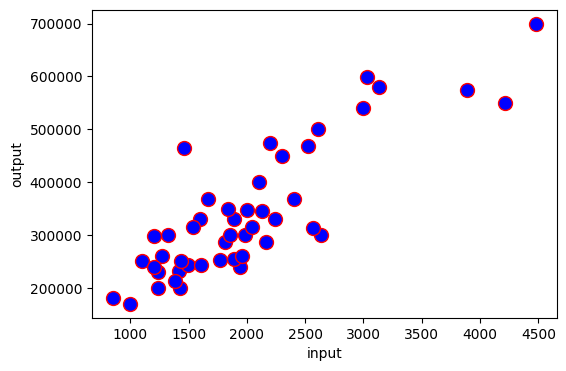

In [11]:
plot_Data(X[:, 0], y)

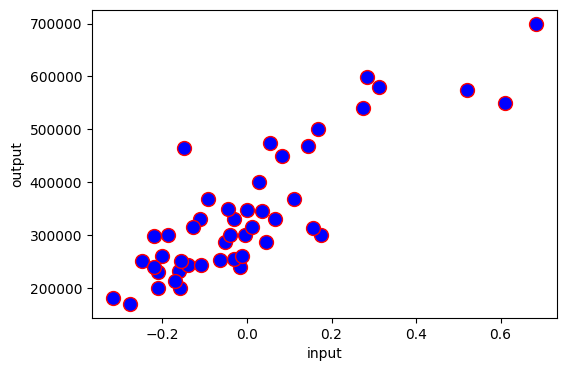

In [12]:
plot_Data(X_norm[:, 0], y)

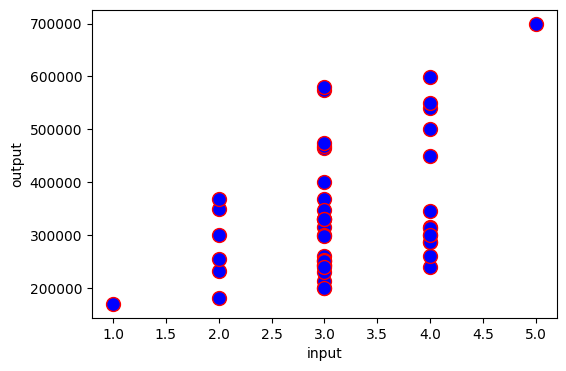

In [13]:
plot_Data(X[:, 1], y)

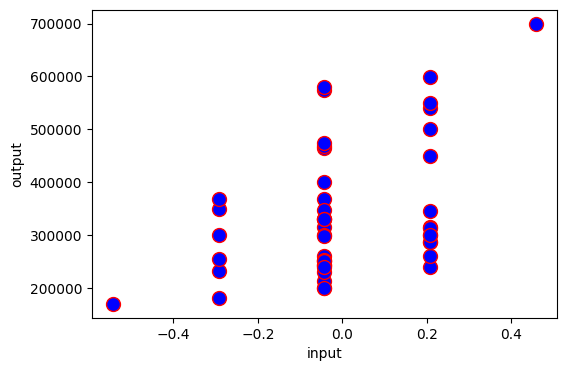

In [14]:
plot_Data(X_norm[:, 1], y)

In [15]:
print(f"shape of X_norm: {X_norm.shape}")
print(f"shape of y: {y.shape}")

shape of X_norm: (47, 2)
shape of y: (47,)


In [16]:
X_norm = np.transpose(X_norm)
X_norm.shape

(2, 47)

In [17]:
y = np.expand_dims(y, 1)
y = np.transpose(y)
y.shape

(1, 47)

In [18]:
print(f"shape of X_norm: {X_norm.shape}")
print(f"shape of y: {y.shape}")

shape of X_norm: (2, 47)
shape of y: (1, 47)


In [19]:
m = X_norm.shape[1]
X_norm = np.concatenate([np.ones((1, m)), X_norm], axis= 0)
X_norm.shape

(3, 47)

In [20]:
def Cost(X, y, theta_temp):
  m = X.shape[1]
  temp = np.matmul(np.transpose(theta_temp), X) - y
  cost = (1 / (2 * m)) * np.matmul(temp, np.transpose(temp))
  return cost

In [21]:
theta = np.array([[0], [0], [0]])
J = Cost(X_norm, y, theta)
print(f"cost with initial theta {J}")

cost with initial theta [[6.55915481e+10]]


In [22]:
def Gradient_Descent(X, y, theta_temp, lr, num_epochs):
  m = X.shape[1]
  J_history = []

  for epoch in range(num_epochs):
    temp = np.matmul(X, np.transpose(np.matmul(np.transpose(theta_temp), X) - y))
    theta_temp = theta_temp - (lr / m) * temp
    J_history.append(Cost(X, y, theta_temp)[0,0])

  return theta_temp, J_history

In [23]:
theta = np.array([[-1], [0], [-1]])
epochs = 500
lr = 0.001
theta, J_history = Gradient_Descent(X_norm, y, theta, lr, epochs)
print(theta)

[[133992.98386537]
 [ 11303.93463133]
 [  5037.79834439]]


In [24]:
x1_norm = (500 - mean[0]) / range_1[0]
x2_norm = (5 - mean[1]) / range_1[1]
print(f"x1_norm : {x1_norm}")
print(f"x2_norm : {x2_norm}")
price = theta[0] + theta[1] * x1_norm + theta[2] * x2_norm
print(f"predicted price = {price}")

x1_norm : -0.4138667542922862
x2_norm : 0.45744680851063835
predicted price = [131619.18590333]


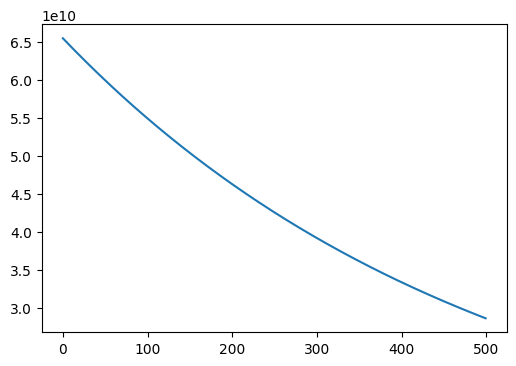

In [25]:
plt.figure(figsize= (6, 4))
plt.plot(J_history)